<a href="https://colab.research.google.com/github/Sehajbirsingh/ML-1/blob/main/Task_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
covid_data = pd.read_csv('covid_daily.csv')

In [5]:
print(covid_data.head())

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-05-06 02:32:31   
1  22001.0     Acadia       Louisiana             US  2020-05-06 02:32:31   
2  51001.0   Accomack        Virginia             US  2020-05-06 02:32:31   
3  16001.0        Ada           Idaho             US  2020-05-06 02:32:31   
4  19001.0      Adair            Iowa             US  2020-05-06 02:32:31   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707         33       0          0      33   
1  30.295065  -92.414197        136      10          0     126   
2  37.767072  -75.632346        429       7          0     422   
3  43.452658 -116.241552        713      19          0     694   
4  41.330756  -94.471059          2       0          0       2   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  


In [6]:
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2938 non-null   float64
 1   Admin2          2937 non-null   object 
 2   Province_State  3057 non-null   object 
 3   Country_Region  3247 non-null   object 
 4   Last_Update     3247 non-null   object 
 5   Lat             3178 non-null   float64
 6   Long_           3178 non-null   float64
 7   Confirmed       3247 non-null   int64  
 8   Deaths          3247 non-null   int64  
 9   Recovered       3247 non-null   int64  
 10  Active          3247 non-null   int64  
 11  Combined_Key    3247 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 304.5+ KB
None


In [7]:
print(covid_data.isnull().sum())

FIPS              309
Admin2            310
Province_State    190
Country_Region      0
Last_Update         0
Lat                69
Long_              69
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


In [15]:
# Show the number of Confirmed cases by Country
confirmed_by_country = covid_data.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False)

confirm_df = pd.DataFrame(confirmed_by_country).reset_index()
print("Confirmed cases by Country:")
print(confirm_df)

Confirmed cases by Country:
           Country_Region  Confirmed
0                      US    1203461
1                   Spain     219329
2                   Italy     213013
3          United Kingdom     196238
4                  France     172219
..                    ...        ...
191                 Palau          0
192  Winter Olympics 2022          0
193  Summer Olympics 2020          0
194            Antarctica          0
195              Kiribati          0

[196 rows x 2 columns]


In [14]:
# Show the number of Deaths by Country
deaths_by_country = covid_data.groupby('Country_Region')['Deaths'].sum().sort_values(ascending=False)

deaths_df = pd.DataFrame(deaths_by_country).reset_index()
print("\nDeaths by Country:")
print(deaths_df)


Deaths by Country:
           Country_Region  Deaths
0                      US   71986
1          United Kingdom   42540
2                   Italy   29315
3                   Spain   25613
4                  France   25537
..                    ...     ...
191           South Sudan       0
192                  Fiji       0
193                 Nepal       0
194  Summer Olympics 2020       0
195                  Laos       0

[196 rows x 2 columns]


In [13]:
# Show the number of Recovered cases by Country
recovered_by_country = covid_data.groupby('Country_Region')['Recovered'].sum().sort_values(ascending=False)

# Convert the result into a DataFrame
recovered_df = pd.DataFrame(recovered_by_country).reset_index()

# Display the DataFrame in tabular form
print("\nRecovered cases by Country:")
print(recovered_df)



Recovered cases by Country:
    Country_Region  Recovered
0               US     189791
1          Germany     135100
2            Spain     123486
3            Italy      85231
4             Iran      80475
..             ...        ...
191          Tonga          0
192          Palau          0
193     Tajikistan          0
194          Samoa          0
195         Tuvalu          0

[196 rows x 2 columns]


In [16]:
# Show the number of Active Cases by Country
active_by_country = covid_data.groupby('Country_Region')['Active'].sum().sort_values(ascending=False)

active_df= pd.DataFrame(active_by_country).reset_index()
print("\nActive cases by Country:")
print(active_df)


Active cases by Country:
           Country_Region   Active
0                      US  1134132
1          United Kingdom   165816
2                  Russia   134054
3                   Italy    98467
4                  France    93840
..                    ...      ...
191                Tuvalu        0
192  Summer Olympics 2020        0
193              Suriname        0
194                 Tonga        0
195                 Samoa        0

[196 rows x 2 columns]


In [17]:
# Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise
latest_country_stats = covid_data.groupby('Country_Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).sort_values('Confirmed', ascending=False)

latest_df= pd.DataFrame(latest_country_stats).reset_index()
print("\nLatest Country-wise stats:")
print(latest_df.head(10))



Latest Country-wise stats:
   Country_Region  Confirmed  Deaths  Recovered   Active
0              US    1203461   71986     189791  1134132
1           Spain     219329   25613     123486    70230
2           Italy     213013   29315      85231    98467
3  United Kingdom     196238   42540        926   165816
4          France     172219   25537      52842    93840
5         Germany     167007    6993     135100    24914
6          Russia     155370    1451      19865   134054
7          Turkey     129491    3520      73285    52686
8          Brazil     115455    7938      48221    59296
9            Iran      99970    6340      80475    13155


In [32]:
#countries with no recovered cases

no_recovered = covid_data.groupby('Country_Region')['Recovered'].sum().sort_values(ascending=False).reset_index()

no_recovered_df = no_recovered[no_recovered['Recovered'] == 0]

no_recovered_df = no_recovered_df.reset_index(drop=True)

print(no_recovered_df[['Country_Region', 'Recovered']])



          Country_Region  Recovered
0   Winter Olympics 2022          0
1             Antarctica          0
2                Comoros          0
3   Summer Olympics 2020          0
4               Kiribati          0
5           Korea, North          0
6             MS Zaandam          0
7            South Sudan          0
8                  Nauru          0
9                  Tonga          0
10                 Palau          0
11            Tajikistan          0
12                 Samoa          0
13                Tuvalu          0


In [33]:
#Top 10 countries with Confirmed cases
top_10_confirmed = covid_data.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 countries with Confirmed cases:")
print(top_10_confirmed)



Top 10 countries with Confirmed cases:
Country_Region
US                1203461
Spain              219329
Italy              213013
United Kingdom     196238
France             172219
Germany            167007
Russia             155370
Turkey             129491
Brazil             115455
Iran                99970
Name: Confirmed, dtype: int64


In [35]:


active_by_country = covid_data.groupby('Country_Region')['Active'].sum().sort_values(ascending=False).head(10)

active_df= pd.DataFrame(active_by_country).reset_index()
print("\nActive cases by Country:")
print(active_df)


Active cases by Country:
   Country_Region   Active
0              US  1134132
1  United Kingdom   165816
2          Russia   134054
3           Italy    98467
4          France    93840
5           Spain    70230
6          Brazil    59296
7          Canada    59019
8          Turkey    52686
9     Netherlands    35962


In [47]:
import pandas as pd
import matplotlib.pyplot as plt



Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 20,000

In [41]:
import plotly.express as px

high_death_countries = latest_country_stats[latest_country_stats['Deaths'] > 20000]
fig = px.bar(high_death_countries,
             x=high_death_countries.index,
             y=['Deaths', 'Confirmed', 'Recovered', 'Active'],
             title='Countries with Deaths Exceeding 50,000',
             labels={'value': 'Number of Cases', 'variable': 'Case Type'},
             barmode='group')
fig.show()


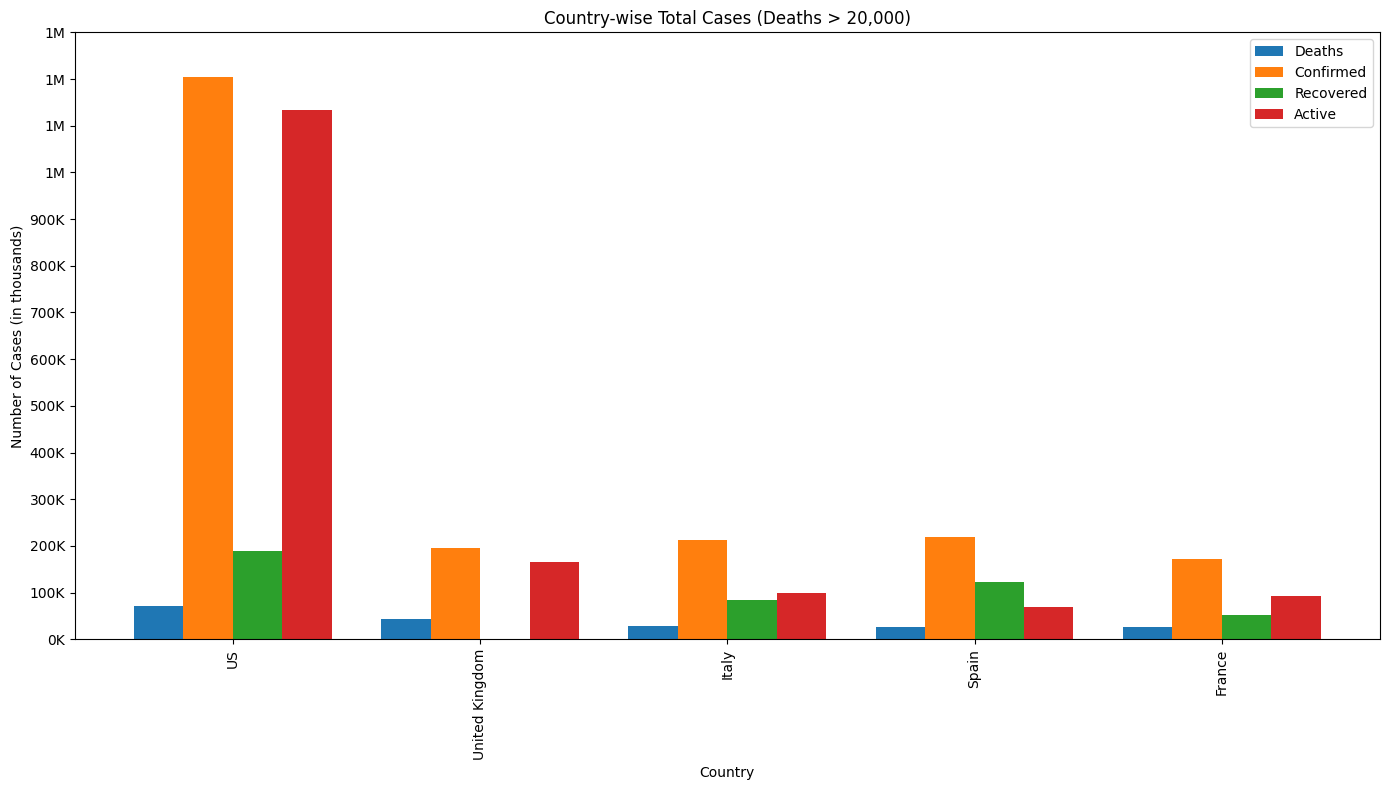

In [46]:

# Group by Country_Region and sum up the cases
country_summary = covid_data.groupby('Country_Region').agg({
    'Deaths': 'sum',
    'Confirmed': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

# Filter countries where total deaths exceed 20,000
countries_over_20000_deaths = country_summary[country_summary['Deaths'] > 20000]

# Sort countries by the number of deaths in descending order
countries_over_20000_deaths = countries_over_20000_deaths.sort_values(by='Deaths', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.2  # Width of the bars
x = range(len(countries_over_20000_deaths))

# Create bars
ax.bar([i - width*1.5 for i in x], countries_over_20000_deaths['Deaths'], width=width, label='Deaths')
ax.bar([i - width*0.5 for i in x], countries_over_20000_deaths['Confirmed'], width=width, label='Confirmed')
ax.bar([i + width*0.5 for i in x], countries_over_20000_deaths['Recovered'], width=width, label='Recovered')
ax.bar([i + width*1.5 for i in x], countries_over_20000_deaths['Active'], width=width, label='Active')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of Cases (in thousands)')
ax.set_title('Country-wise Total Cases (Deaths > 20,000)')
ax.set_xticks(x)
ax.set_xticklabels(countries_over_20000_deaths['Country_Region'], rotation=90)
ax.legend()

# Set y-axis scale and ticks
max_y = countries_over_20000_deaths[['Deaths', 'Confirmed', 'Recovered', 'Active']].max().max()
ax.set_yticks([i * 100000 for i in range(0, int(max_y / 100000) + 2)])
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M' if x >= 1000000 else f'{int(x/1000)}K'))

# Show plot
plt.tight_layout()
plt.show()


Plot Province/State wise Deaths in USA

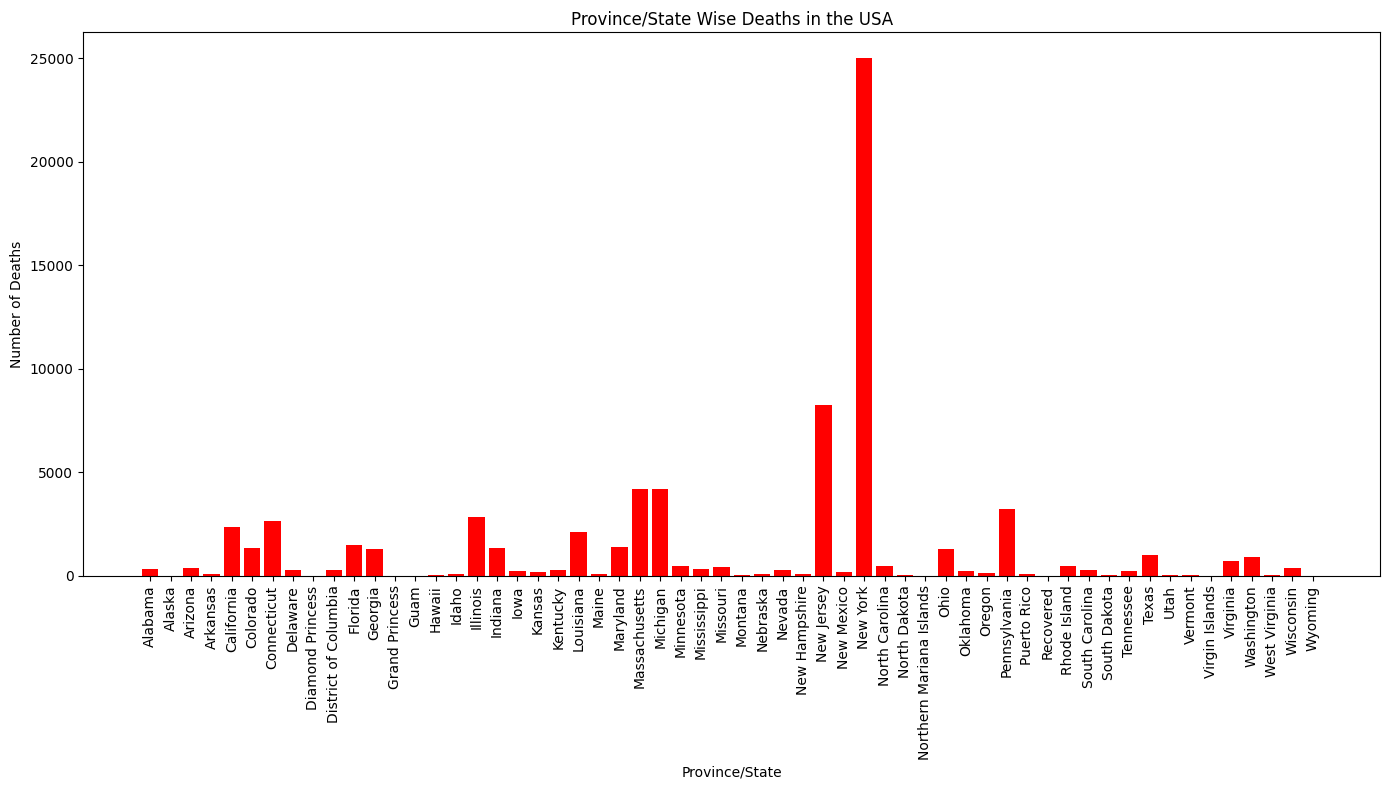

In [48]:
# Filter data for USA
usa_data = covid_data[covid_data['Country_Region'] == 'US']

# Group by Province_State and sum up the deaths
usa_deaths = usa_data.groupby('Province_State')['Deaths'].sum().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(usa_deaths['Province_State'], usa_deaths['Deaths'], color='red')
ax.set_title('Province/State Wise Deaths in the USA')
ax.set_xlabel('Province/State')
ax.set_ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
